# Inverted-pendulum

In [1]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [2]:
runs = load_runs('../../../sacred_data/sacred_runs_master/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../../../sacred_data/sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))
trpo_runs = load_runs('../../../sacred_data/sacred_trpo/')


Loaded runs: 572
Loaded final runs: 704
Loaded trpo runs: 45


In [3]:
# Merge the runs
total_runs = {}
for key, value in runs.items():
    total_runs[str(key) + '-base'] = value
for key, value in final_runs.items():
    total_runs[str(key) + '-final'] = value
for key, value in trpo_runs.items():
    total_runs[str(key) + '-trpo'] = value

In [4]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 0.99,
    'config.clipping': False,
    'config.njobs': 1,
    'config.natural': False,
    'config.policy': 'linear',
    'config.iw_norm': 'none'
}

## Increasing delta for linear policies

----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 10
Seeds: 10, 160, 109, 904, 109, 570, 904, 10, 570, 160
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 10
Seeds: 109, 10, 160, 570, 570, 109, 904, 904, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.999999999999
Experiments: 5
Seeds: 904, 109, 160, 10, 570
----------------------------------------
Method: pdis  - Delta: 1.0
Experiments: 5
Seeds: 570, 160, 109, 10, 904


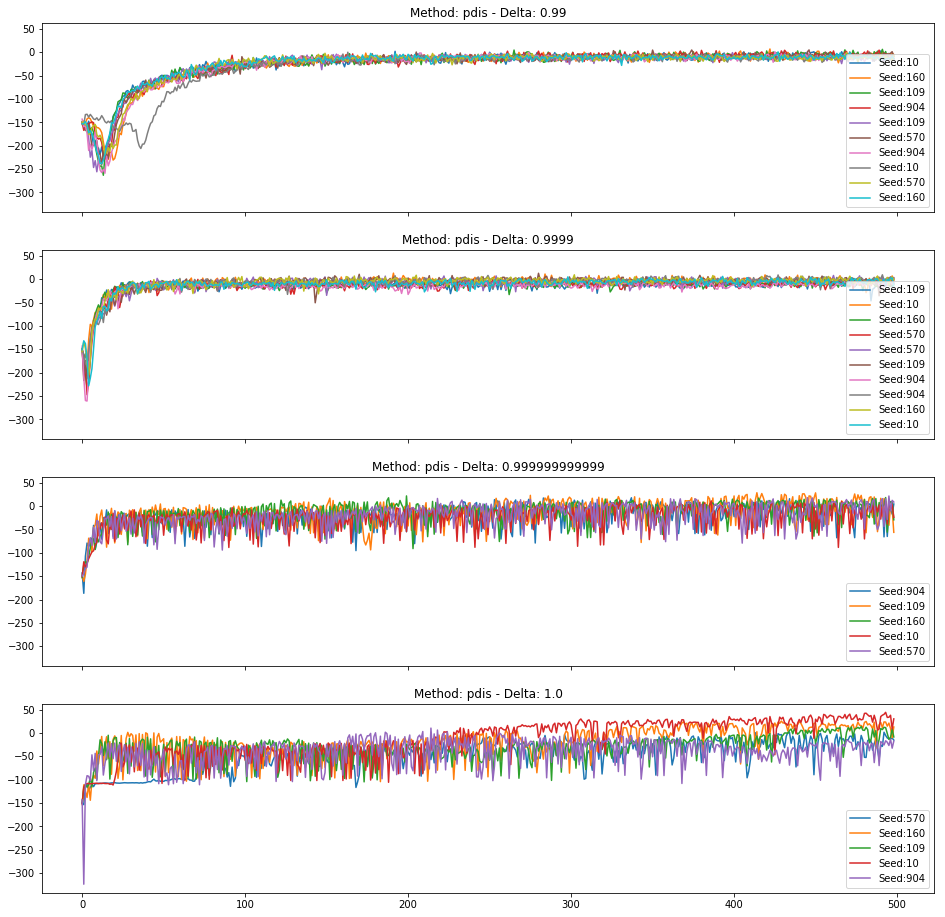

In [5]:
N = 4
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.99), 
                                              ('pdis', 'pdis-max-d2', 0.9999),
                                              ('pdis', 'pdis-max-d2', 0.999999999999),
                                              ('pdis', 'pdis-max-d2', 1.0),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Switch to non-linear policies

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 10
Seeds: 904, 904, 109, 10, 160, 570, 10, 570, 109, 160
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 10
Seeds: 160, 904, 10, 570, 109, 904, 10, 160, 570, 109
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 10
Seeds: 10, 570, 904, 160, 904, 570, 160, 10, 109, 109
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 904, 570, 160, 109, 10


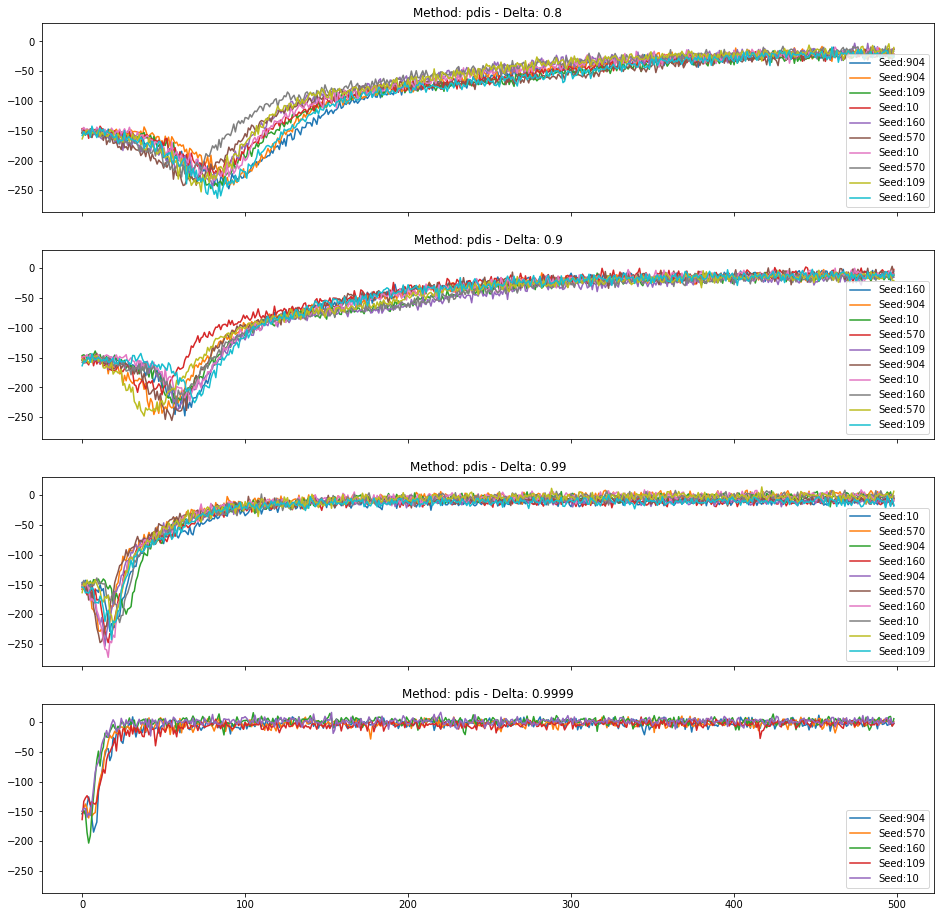

In [6]:
N = 4
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Xavier init

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 904, 109, 10, 570, 160
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 10
Seeds: 570, 904, 570, 109, 10, 160, 904, 160, 109, 10
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 109, 904, 570, 10, 160


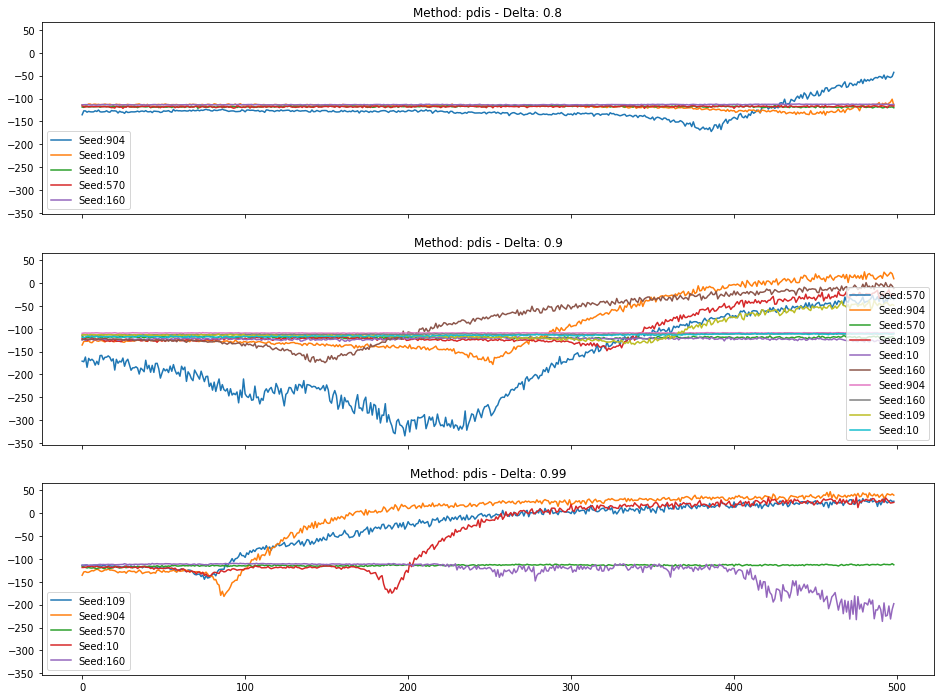

In [7]:
N = 3
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Mean reward bound

----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 160, 904, 10, 109, 570
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 109, 570, 160, 10, 904


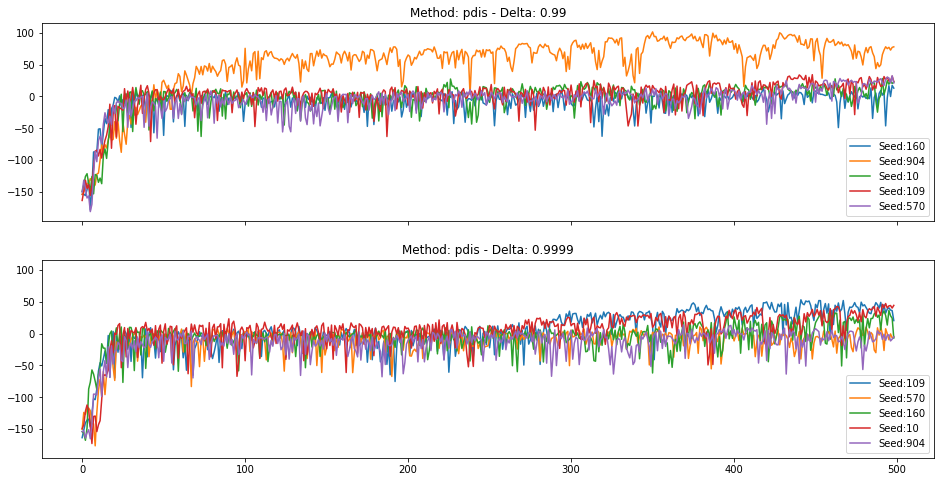

In [8]:
N = 2
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-mean-d2', 0.99),
                                              ('pdis', 'pdis-mean-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();